In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download("all")
import seaborn as sns
logReg = LogisticRegression(max_iter=1000000)


In [8]:
reviews = pd.read_csv("imdb-reviews-pt-br.csv")
reviews

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [9]:
# turn string classification as ints, to make a easier understandement
reviewsBinary = reviews['sentiment'].replace(['neg', 'pos'], [0, 1])
reviews['Classification'] = reviewsBinary
reviews


,id,text_en,text_pt,sentiment,Classification
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


# Logistic Regression
A way to predict if a review is positive or negative through classification learning, i highly recommend this video https://www.youtube.com/watch?v=EoP2wN0yuHA&t for those who want to really understand Logistic Regression. 

In [63]:
def Classify(reviews, campo, max_features):
    embedding = CountVectorizer(max_features=max_features)
    bag_of_words = embedding.fit_transform(reviews[f'{campo}'])
    train, test, train_class, test_class = train_test_split(
        bag_of_words, reviews['Classification'], random_state=42, train_size=0.8)
    logReg.fit(train, train_class)
    print(logReg.score(test, test_class))


In [11]:
Classify(reviews,'text_pt' , max_features=2200)

0.8677719369187222


# Word Clouds 
A simple way to analize which are the most recurrents words in the text corpus

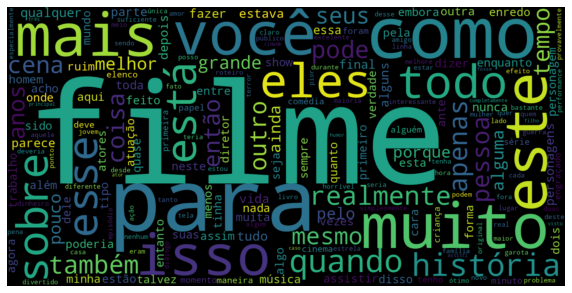

In [12]:
todas_palavras = ' '.join([text for text in reviews['text_pt']])

wordcloud = WordCloud(background_color="black", width=1600, height=800,
                      min_word_length=4, collocations=False).generate(todas_palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()


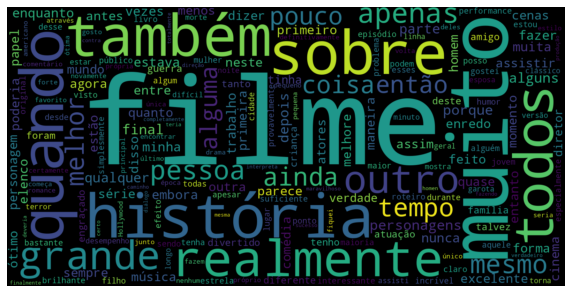

In [13]:
pos_df = reviews.query("Classification == 1")
pos_palavras = ' '.join([text for text in pos_df['text_pt']])

wordcloud = WordCloud(
                      background_color="black",
                      width=1600, height=800, min_word_length= 5, collocations= False).generate(pos_palavras)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()


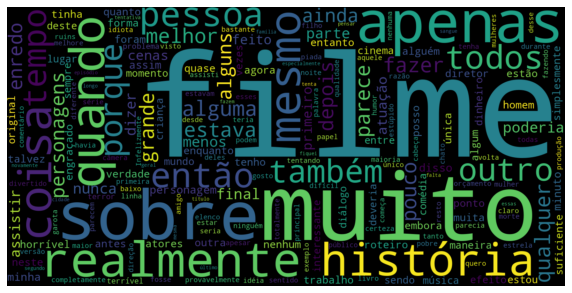

In [14]:
neg_df = reviews.query("Classification == 0")
neg_palavras = ' '.join([text for text in neg_df['text_pt']])

wordcloud = WordCloud(
                      background_color="black",
                      width=1600, height=800, min_word_length= 5, collocations= False).generate(neg_palavras)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# Tokenization
Making phrases into vectors thorugh this process

In [15]:
from nltk import tokenize
token = tokenize.WhitespaceTokenizer()
token_pun = tokenize.WordPunctTokenizer()


def Tokenize_plot(todas_palavras):
    tokenized = token.tokenize(todas_palavras)
    freq = nltk.FreqDist(tokenized)
    df_frequencia = pd.DataFrame({"Palavra": list(freq.keys()),
                                  "Frequencia": list(freq.values())})
    df_freq_sort = df_frequencia.nlargest(n=20, columns=["Frequencia"])
    ax = sns.barplot(data=df_freq_sort, x="Palavra", y="Frequencia")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()


# Frequencies
Check the frequencies of the words post vectorization utilizing barplots contaning those words

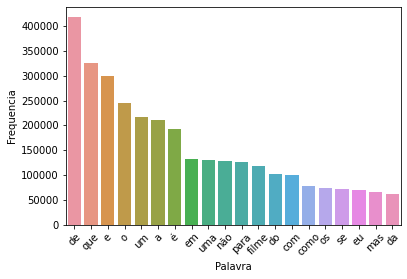

In [16]:
Tokenize_plot(todas_palavras)

In [17]:
stop_words = set(nltk.corpus.stopwords.words('portuguese'))
stop_words.add('-')
stop_words = list(stop_words)


def Tokenize_plot_filter(todas_palavras):
    tokenized = token.tokenize(todas_palavras)
    filtered = [w for w in tokenized if not w.lower() in stop_words]
    freq = nltk.FreqDist(filtered)
    df_frequencia = pd.DataFrame({"Palavra": list(freq.keys()),
                                  "Frequencia": list(freq.values())})
    df_freq_sort = df_frequencia.nlargest(n=20, columns=["Frequencia"])
    ax = sns.barplot(data=df_freq_sort, x="Palavra", y="Frequencia")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()


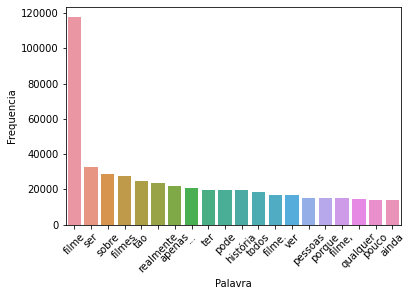

In [18]:
Tokenize_plot_filter(todas_palavras)

# Applying word processing
Trying to facilitate the understandment of the text to the computer

# 1) Stop words
Through nltk library receive a list of stop words, http://www.nltk.org/howto/portuguese_en.html, which can remove some unwished words

In [19]:
def process_string(reviews, campo, stopped, n):
    new_phrase = []
    for phrases in reviews[f'{campo}']:
        processed_phrase = []
        phrases_t = token.tokenize(phrases)
        for w in phrases_t:
            if w not in stopped:
                processed_phrase.append(w)
        new_phrase.append(' '.join(processed_phrase))
    reviews[f'processed{n}'] = new_phrase
process_string(reviews, 'text_pt', stop_words, 1)

In [41]:
Classify(reviews, 'processed1', max_features= 2200)

0.8643348160129397


# 2) Removing Punctiation
A way to facilitate the text comprehension

In [29]:
from string import punctuation

punt = list()
for p in punctuation:
    punt.append(p)
new_stop_words = stop_words + punt
new_phrase = []
for phrases in reviews['processed1']:
    processed_phrase = []
    phrases_t = token_pun.tokenize(phrases.lower())
    for w in phrases_t:
        if w not in new_stop_words:
            processed_phrase.append(w)
    new_phrase.append(' '.join(processed_phrase))
reviews[f'processed{2}'] = new_phrase


In [40]:
Classify(reviews, 'processed2', max_features= 2200)

0.8637282652648605


In [23]:
todas_palavras = ' '.join([text for text in reviews['processed2']])

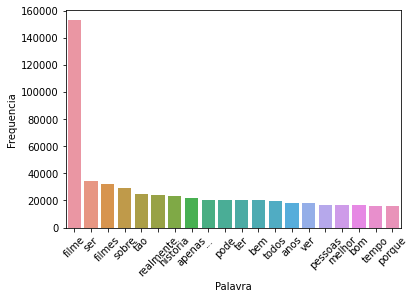

In [24]:
Tokenize_plot_filter(todas_palavras)

In [31]:
reviews

,id,text_en,text_pt,sentiment,Classification,processed1,processed2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",vez sr costner arrumou filme tempo necessário ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,exemplo motivo maioria filmes ação mesmos gené...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,beatles puderam escrever músicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",filmes fotos latão palavra apropriada verdade ...
...,...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,"Como média votos baixa, fato funcionário locad...",média votos baixa fato funcionário locadora ac...
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,O enredo algumas reviravoltas infelizes inacre...,enredo algumas reviravoltas infelizes inacredi...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,Estou espantado forma filme maioria outros méd...,espantado forma filme maioria outros média 5 e...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,A Christmas Together realmente veio antes temp...,christmas together realmente veio antes tempo ...


# Stemming
Stemming algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. This indiscriminate cutting can be successful in some occasions, but not always, and that is why we affirm that this approach presents some limitations.

In [36]:
stemmer = nltk.RSLPStemmer()
stem = list()
new_phrase = []
for phrases in reviews['processed2']:
    processed_phrase = []
    phrases_t = token_pun.tokenize(phrases)
    for w in phrases_t:
        if w not in new_stop_words:
            processed_phrase.append(stemmer.stem(w))
    new_phrase.append(' '.join(processed_phrase))
reviews[f'processed{3}'] = new_phrase

In [37]:
reviews

,id,text_en,text_pt,sentiment,Classification,processed1,processed2,processed3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",vez sr costner arrumou filme tempo necessário ...,vez sr costn arrum film temp necess além terr ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,exemplo motivo maioria filmes ação mesmos gené...,exempl motiv maior film açã mesm genér chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,beatles puderam escrever músicas todos gostass...,beatl pud escrev músic tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",filmes fotos latão palavra apropriada verdade ...,film fot lat palavr apropri verdad tant ous qu...
...,...,...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,"Como média votos baixa, fato funcionário locad...",média votos baixa fato funcionário locadora ac...,"méd vot baix fat funcion loc ach tud bem "", mu..."
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,O enredo algumas reviravoltas infelizes inacre...,enredo algumas reviravoltas infelizes inacredi...,enred algum reviravolt infeliz inacredit entan...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,Estou espantado forma filme maioria outros méd...,espantado forma filme maioria outros média 5 e...,espant form film maior outr méd 5 estrel men f...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,A Christmas Together realmente veio antes temp...,christmas together realmente veio antes tempo ...,christm togeth real vei ant temp cri john denv...


In [42]:
Classify(reviews, 'processed3', max_features=2200)

0.866053376465831


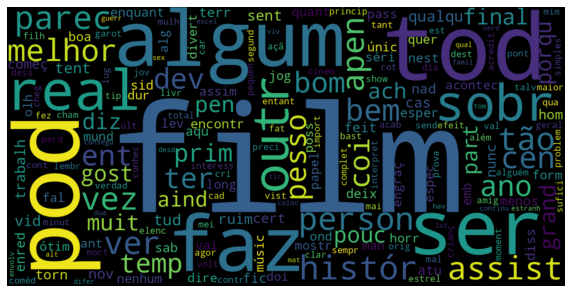

In [44]:
todas_palavras = ' '.join([text for text in reviews['processed3']])

wordcloud = WordCloud(background_color="black", width=1600, height=800,
                      min_word_length=3, collocations=False).generate(todas_palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# 3) TF - IDF
TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(max_features=2200)
phrase_tf_ifd = tf_idf.fit_transform(reviews['processed3'])
train, test, train_class, test_class = train_test_split(phrase_tf_ifd, reviews['Classification'], random_state=42, train_size=0.8)
logReg.fit(train, train_class)
print(logReg.score(test, test_class))

0.87221997573797


In [73]:
tf_idf = TfidfVectorizer(max_features=2200)
phrase_tf_ifd = tf_idf.fit_transform(reviews['text_pt'])
train, test, train_class, test_class = train_test_split(phrase_tf_ifd, reviews['Classification'], random_state=42, train_size=0.8)
logReg.fit(train, train_class)
print(logReg.score(test, test_class))

0.8726243429033562


# 4)  N grams
 n-grams are used for a variety of things. Some examples include auto completion of sentences (such as the one we see in Gmail these days), auto spell check (yes, we can do that as well), and to a certain extent, we can check for grammar in a given sentence. 

In [81]:
tf_idf = TfidfVectorizer(ngram_range=(1,2))
vector_tf_idf = tf_idf.fit_transform(reviews['processed3'])
train, test, train_class, test_class = train_test_split(vector_tf_idf, reviews['Classification'], random_state=42, train_size=0.8)
logReg.fit(train, train_class)
print(logReg.score(test, test_class))

0.8870804690659119


In [82]:
tf_idf = TfidfVectorizer(ngram_range=(1,2))
vector_tf_idf = tf_idf.fit_transform(reviews['text_pt'])
train, test, train_class, test_class = train_test_split(vector_tf_idf, reviews['Classification'], random_state=42, train_size=0.8)
logReg.fit(train, train_class)
print(logReg.score(test, test_class))

0.887282652648605


# Final results post word processing
Showing which words have the highest influence in the process of predction through Logistic Regression

In [86]:
pesos = pd.DataFrame(
    logReg.coef_[0].T,
    index = tf_idf.get_feature_names()
)
pesos.nlargest(10, 0)

,0
excelente,7.658182
ótimo,6.941508
incrível,6.227098
também,4.714014
divertido,4.618616
dos melhores,4.325433
hoje,4.275246
perfeito,4.237804
brilhante,4.225937
gostei,4.022676


In [87]:
pesos.nsmallest(10,0)

,0
ruim,-10.451306
pior,-10.396242
horrível,-8.944130
não,-7.972856
terrível,-7.534458
nada,-6.383542
mal,-6.086953
chato,-5.760423
piores,-5.518407
nem,-5.148230


# Conclusion
Overall, applying all those techniques were a good way to lean NLP concepts and Logistic Regression. The final acurracy for the LR was 88%, which is a good result